# IMPORTING LIBRARIES

In [1]:
pip install --upgrade keras-nlp

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import seaborn as sns
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

2024-07-28 11:06:42.738020: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 11:06:44.551272: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 11:06:45.511335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 11:06:46.413698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 11:06:46.602575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-28 11:06:48.208269: I tensorflow/core/platform/cpu_feature_gu

In [3]:
gpu =tf.config.experimental.list_physical_devices('GPU')

In [4]:
gpus=tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

/tmp/ipykernel_4090/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
image_exts=['jpeg','jpg','bmp','png']

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# LOADING IMAGES

In [9]:
im_path ="/home/blackmask1130/PROJECT/medicinal images/"
img = cv2.imread(im_path)

# DATA PREPROCESSING

## TRAINING IMAGE

In [10]:
training_set =tf.keras.utils.image_dataset_from_directory(
    '/home/blackmask1130/PROJECT/medicinal images/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 920 files belonging to 126 classes.


## VALIDATION IMAGE

In [11]:
validation_set =tf.keras.utils.image_dataset_from_directory(
    '/home/blackmask1130/PROJECT/medicinal images/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 920 files belonging to 126 classes.


In [12]:
training_set
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 126), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break


tf.Tensor(
[[[[1.56683594e+02 4.87187500e+01 1.96132812e+01]
   [1.47261719e+02 3.98398438e+01 8.05078125e+00]
   [1.41000000e+02 2.96484375e+01 0.00000000e+00]
   ...
   [1.28296875e+02 1.52121094e+02 1.61769531e+02]
   [1.21843750e+02 1.50316406e+02 1.63894531e+02]
   [1.19070312e+02 1.50964844e+02 1.65929688e+02]]

  [[1.47018066e+02 4.13657227e+01 1.22805786e+01]
   [1.42424438e+02 3.74370117e+01 6.04315186e+00]
   [1.39164001e+02 3.12811890e+01 4.76501465e-01]
   ...
   [1.42476746e+02 1.66504211e+02 1.76051025e+02]
   [1.37270203e+02 1.65225708e+02 1.77769531e+02]
   [1.33564087e+02 1.65438293e+02 1.79246887e+02]]

  [[1.34100403e+02 3.33698730e+01 4.88287354e+00]
   [1.35254333e+02 3.44183960e+01 3.57849121e+00]
   [1.35990784e+02 3.30142212e+01 1.31359863e+00]
   ...
   [1.54605469e+02 1.78781250e+02 1.88253906e+02]
   [1.46856262e+02 1.74434387e+02 1.85957886e+02]
   [1.42921814e+02 1.74208313e+02 1.86589844e+02]]

  ...

  [[4.51680298e+01 7.74935303e+01 3.35000610e+01]
   [2

# BUILDING MODEL

In [14]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [15]:
model = Sequential()

##BUILDING CONVOLUTION LAYER

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

/home/blackmask1130/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(units=1500,activation='relu'))

In [24]:
model.add(Dropout(0.4))

In [25]:
model.add(Dense(units=126,activation='softmax'))


compling model

In [26]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 126)            │       189,126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,550,850 (124.17 MB)

 Trainable params: 32,550,850 (124.17 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2024-07-28 11:09:50.058902: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1073741824 exceeds 10% of free system memory.
2024-07-28 11:09:52.437918: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1057030144 exceeds 10% of free system memory.
2024-07-28 11:09:55.285554: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 528515072 exceeds 10% of free system memory.
2024-07-28 11:09:56.132193: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 512000000 exceeds 10% of free system memory.
2024-07-28 11:10:33.009849: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 512000000 exceeds 10% of free system memory.


8/8 ━━━━━━━━━━━━━━━━━━━━ 958s 116s/step - accuracy: 0.0075 - loss: 8.3186 - val_accuracy: 0.0141 - val_loss: 4.7839
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 777s 79s/step - accuracy: 0.0107 - loss: 4.7813 - val_accuracy: 0.0141 - val_loss: 4.7763
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 827s 92s/step - accuracy: 0.0064 - loss: 4.7637 - val_accuracy: 0.0141 - val_loss: 4.7158
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 578s 67s/step - accuracy: 0.0069 - loss: 4.7338 - val_accuracy: 0.0141 - val_loss: 4.7175
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 861s 109s/step - accuracy: 0.0139 - loss: 4.7325 - val_accuracy: 0.0141 - val_loss: 4.7099
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 616s 65s/step - accuracy: 0.0125 - loss: 4.7285 - val_accuracy: 0.0141 - val_loss: 4.6911
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 733s 95s/step - accuracy: 0.0142 - loss: 4.7204 - val_accuracy: 0.0141 - val_loss: 4.6914
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 515s 61s/step - accuracy: 0.0174 - loss: 4.7118 - val_accuracy: 0.0141 - val_loss: 4.6908
E

In [29]:
train_loss,train_acc=model.evaluate(training_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 99s 10s/step - accuracy: 0.0147 - loss: 4.6664


In [30]:
print(train_loss,train_acc)

4.662072658538818 0.015217390842735767


In [31]:
valid_loss,valid_acc=model.evaluate(validation_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 62s 7s/step - accuracy: 0.0170 - loss: 4.6621


In [32]:
print(valid_loss,valid_acc)

4.662072658538818 0.015217390842735767


In [33]:
model.save('trained_model.keras')

In [34]:
training_history.history

{'accuracy': [0.007608695421367884,
  0.009782608598470688,
  0.007608695421367884,
  0.010869565419852734,
  0.01304347813129425,
  0.010869565419852734,
  0.015217390842735767,
  0.014130434952676296,
  0.010869565419852734,
  0.015217390842735767],
 'loss': [7.0173444747924805,
  4.786949157714844,
  4.7546305656433105,
  4.725359916687012,
  4.735942840576172,
  4.713825702667236,
  4.721851825714111,
  4.707357883453369,
  4.703860759735107,
  4.699307441711426],
 'val_accuracy': [0.014130434952676296,
  0.014130434952676296,
  0.014130434952676296,
  0.014130434952676296,
  0.014130434952676296,
  0.014130434952676296,
  0.014130434952676296,
  0.014130434952676296,
  0.014130434952676296,
  0.015217390842735767],
 'val_loss': [4.783917427062988,
  4.776340007781982,
  4.715787887573242,
  4.717549800872803,
  4.70985221862793,
  4.691140174865723,
  4.691416263580322,
  4.69077205657959,
  4.702824592590332,
  4.662073135375977]}

In [35]:
import json
with open('training_hist.json',"w") as f:
  json.dump(training_history.history,f)

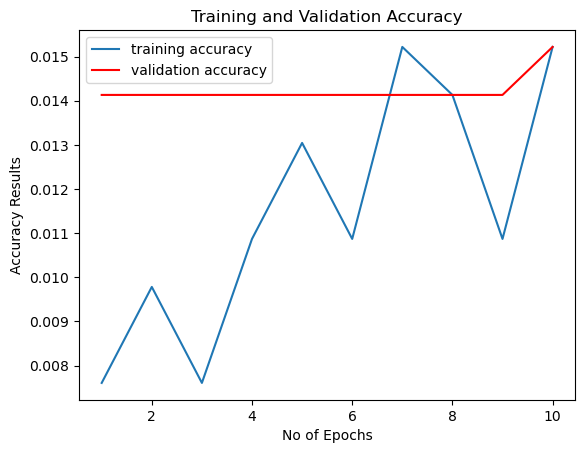

In [36]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],label='training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='red',label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy Results')
plt.legend()
plt.show()

In [37]:
class_name = validation_set.class_names
class_name

['Acacia Nilotica',
 'Achillea_millefolium',
 'Actaea_racemosa',
 'Adusa or Vasaka',
 'Aesculus_hippocastanum',
 'Aesthetic_bunch_of_fenugreek_greens',
 'Ageratina_altissima',
 'Alcea_rosea',
 'Alisma_plantago-aquatica',
 'Aloe Vera',
 'Althaea_officinalis_Prague',
 'Amorphophallus_konjac_(fruit)_',
 'Anise hyssop',
 'Apium_graveolens',
 'ArctiumLappa',
 'Arnica_montana',
 'Astragalus_membranaceus',
 'Augentrost',
 'Bark Cinnamon',
 'Berberis',
 'Bilberry',
 'Bitter_orange_-_Citrus_aurantium',
 'Blessed thistle',
 'Blue_Snakeweed',
 'Blé_tendre_hiver_(GHAYTA)_AO-5-cliche_Jean_Weber',
 'Borage',
 'Boswellia_sacra',
 'Burdock',
 'Calendula',
 'Cannabis',
 'Capsicum_annuum',
 'Carica_papaya',
 "Cat's claw leaf",
 'Catha_edulis',
 'Cayaponia_espelina_',
 'Cayenne peppers',
 'CentaureaCyanus',
 'Chaya leaf',
 'Chickweed',
 'Cilantro',
 'Cinchona.pubescens',
 'Citrus_trifoliata',
 'Cluster_of_Reichardia_tingitana',
 'Cnicus_benedictus_flor',
 'Common Hepatica-Anemone hepatica',
 'Common_sea-

In [38]:
test_set =tf.keras.utils.image_dataset_from_directory(
    '/home/blackmask1130/PROJECT/medicinal images/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=128,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 920 files belonging to 126 classes.


In [41]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

29/29 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step


(array([[7.97112938e-03, 8.50173365e-03, 1.19367037e-02, ...,
         2.70650024e-03, 3.46381008e-03, 2.74713524e-03],
        [7.97312893e-03, 8.50217417e-03, 1.19366366e-02, ...,
         2.70652492e-03, 3.46414442e-03, 2.74794409e-03],
        [7.97499344e-03, 8.50381423e-03, 1.19334320e-02, ...,
         2.71149189e-03, 3.46982898e-03, 2.75361910e-03],
        ...,
        [7.97651336e-03, 8.50440841e-03, 1.19369561e-02, ...,
         2.70634238e-03, 3.46530951e-03, 2.75022141e-03],
        [7.98488222e-03, 8.51796288e-03, 1.18571837e-02, ...,
         2.74180993e-03, 3.51776741e-03, 2.80047022e-03],
        [9.84437764e-04, 3.21902206e-07, 1.03203365e-05, ...,
         2.97687475e-08, 5.00373183e-08, 2.11110269e-03]], dtype=float32),
 (920, 126))

In [42]:
predicted_categories=np.argmax(y_pred,axis=1)
predicted_categories

array([ 37,  37,  37,  37,  37,  37,  20,  37,  21,  37, 103,  37,  58,
        37,  37,  37,  37,  37,  37,  43,  37,  21,  37,  37,  21,  21,
        37,  20,  37,  37,  37,  37,  19,  21,  19,  37,  37,  37,  20,
        21,  37,  37,  11,  19,  19,  37,  37,  37,  37,  37,  37,  37,
        37,  37,  37,  37,  37,  37,  37,  20,  37,  19,  37,  20,  37,
        37,  20,  45,  37,  37,  20,  37,  37,  37,  19,  37,  37,  45,
        37,  37,  37,  37, 118,  37,  37,  20,  30,  37,  37,  37,  58,
        37,  37,  37,  19,  37,  37,  21,  37,  37,  37,  19,  37,  37,
        34,  20,  37,  49,  37,  43,  37,  19,  21,  19,  37,  21,  37,
        19,  37,  37,  37,  37,  37,  19,  37,  37,  43,  37,  37,  37,
        45,  37,  20,  37,  37,  19,  20,  37,  37,  21,  37,  21,  37,
        11,  37,  37,  34, 103,  20,  28,  45,  21,  43,  11,  37,  43,
        37,  37,  37,  43,  37,  28,  37,  37,  47,  37,  37, 118,  20,
        37,  37,  21,  37,  42,  20,  37,  37,  37,  20,  45,  3

In [43]:
true_categories=tf.concat([y for x, y in test_set],axis=0)
true_categories

2024-07-27 19:26:55.066866: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(920, 126), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [44]:
y_true=np.argmax(true_categories,axis=1)
y_true

array([  6,  64,  17,  60,  33,  44,  98,   3, 118,   5,   2, 106,  37,
        21,  45,  27,  57,  11,  77,  40,   2,   7,  16,  32,   8,  63,
        59,  91,  13,  97,  18,  38,  67,  33,  99,  38,  76,  44,  54,
       118,   5, 108,  31, 103,  18,  20,  64,  31,  43, 113,  18,   1,
        56,  39,  79,  49,   8,  54,  50,  20,   4,   6, 121,  81,   1,
       117,  16,  18,  28,  60,  11,  29,  30, 113,  21,  89,  16,  67,
       110,   7,  10,  24,  60,  29,   3,  11,  26,  19,  32,   2,  50,
        34,  22,  46,  61,  50,  96,  41,   9,  26, 113,  33,  25, 120,
        95,  41,  35,   4,  11,  13,  20,   9,  30,  55,  20,  37, 112,
       109, 113,   9,   0, 103, 103,  94,  10,  39,  35,  55,  49,  78,
        70,  69, 103,  31, 109,  88,  73,  64,   9,  17, 112,  36,  61,
        30,  60,  30, 117, 112,  25,  44,  94,   3,  30,  55,  34,  15,
        28,  57,  59,  19,   4,  84,  51,  47,  37,  23,  17, 112,  48,
        37,  79,  43,  11,  43,  28, 125,   7,  43,  15,  20,  3

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                  precision    recall  f1-score   support

                                 Acacia Nilotica       0.00      0.00      0.00        11
                            Achillea_millefolium       0.00      0.00      0.00         8
                                 Actaea_racemosa       0.00      0.00      0.00        11
                                 Adusa or Vasaka       0.00      0.00      0.00        11
                          Aesculus_hippocastanum       0.00      0.00      0.00        10
             Aesthetic_bunch_of_fenugreek_greens       0.00      0.00      0.00        10
                             Ageratina_altissima       0.00      0.00      0.00        10
                                     Alcea_rosea       0.00      0.00      0.00         9
                        Alisma_plantago-aquatica       0.00      0.00      0.00        13
                                       Aloe Vera       0.00      0.00      0.00        13
         

/home/blackmask1130/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/blackmask1130/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/blackmask1130/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
cn=confusion_matrix(y_true,predicted_categories)
cn.shape

(126, 126)

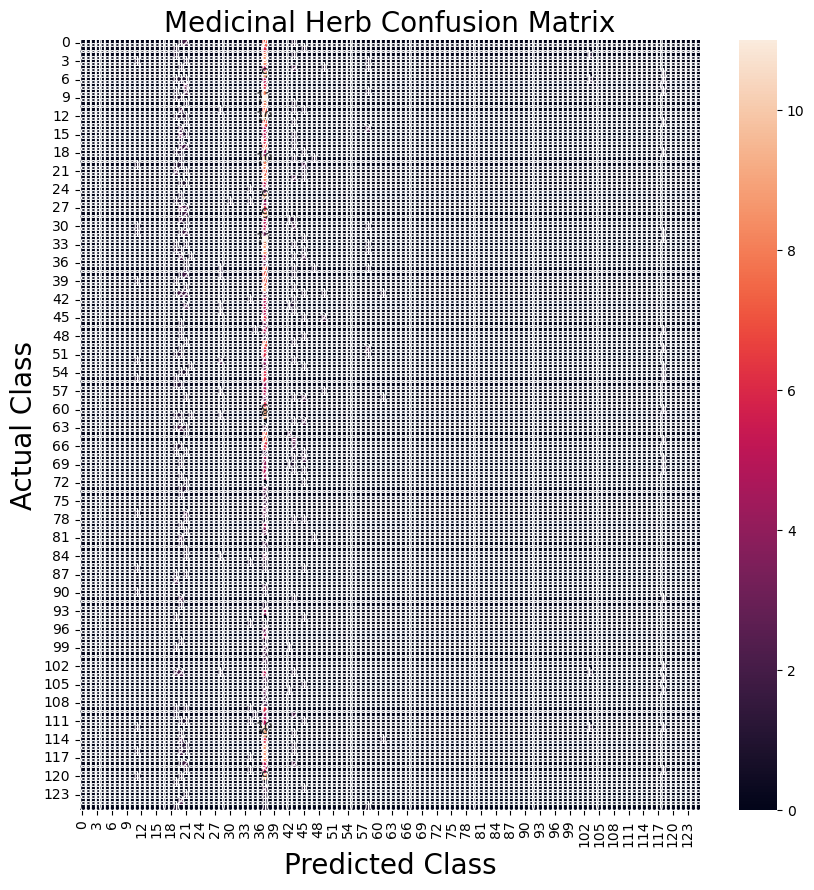

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(cn,annot=True)
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Medicinal Herb Confusion Matrix',fontsize=20)
plt.show()